In [ ]:
## 1. Predicting Heart Disease Using a Classification Tree 

In [1]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv(r'C:\Users\user2\Documents\GitHub\Decision_Trees\python\input\processed.cleveland.data', header=None)

In [28]:
df.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [30]:
df = df.replace('?', np.nan)

# Convertir todas las columnas a tipo numérico
df = df.astype(float)

# Eliminar filas con valores faltantes
df = df.dropna()

# Verificar que ya no hay valores faltantes
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [31]:
# Variables categóricas
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Crear variables dummy (eliminar una categoría base para evitar colinealidad)
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

df.head()

,age,restbp,chol,thalach,oldpeak,hd,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67.0,160.0,286.0,108.0,1.5,2.0,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67.0,120.0,229.0,129.0,2.6,1.0,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0.0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0.0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [32]:
# Crear variable binaria
df['y'] = np.where(df['hd'] > 0, 1, 0)

# Eliminar la original
df = df.drop('hd', axis=1)

# Verificar distribución
df['y'].value_counts()

y
0    160
1    137
Name: count, dtype: int64

## 1.2 Data Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [35]:
X = df.drop(columns=['y'])
y = df['y']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=123, 
    stratify=y
)

In [ ]:
# Entrenamos el modelo con los datos de entrenamiento
clf = DecisionTreeClassifier(random_state=123,max_depth=3)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


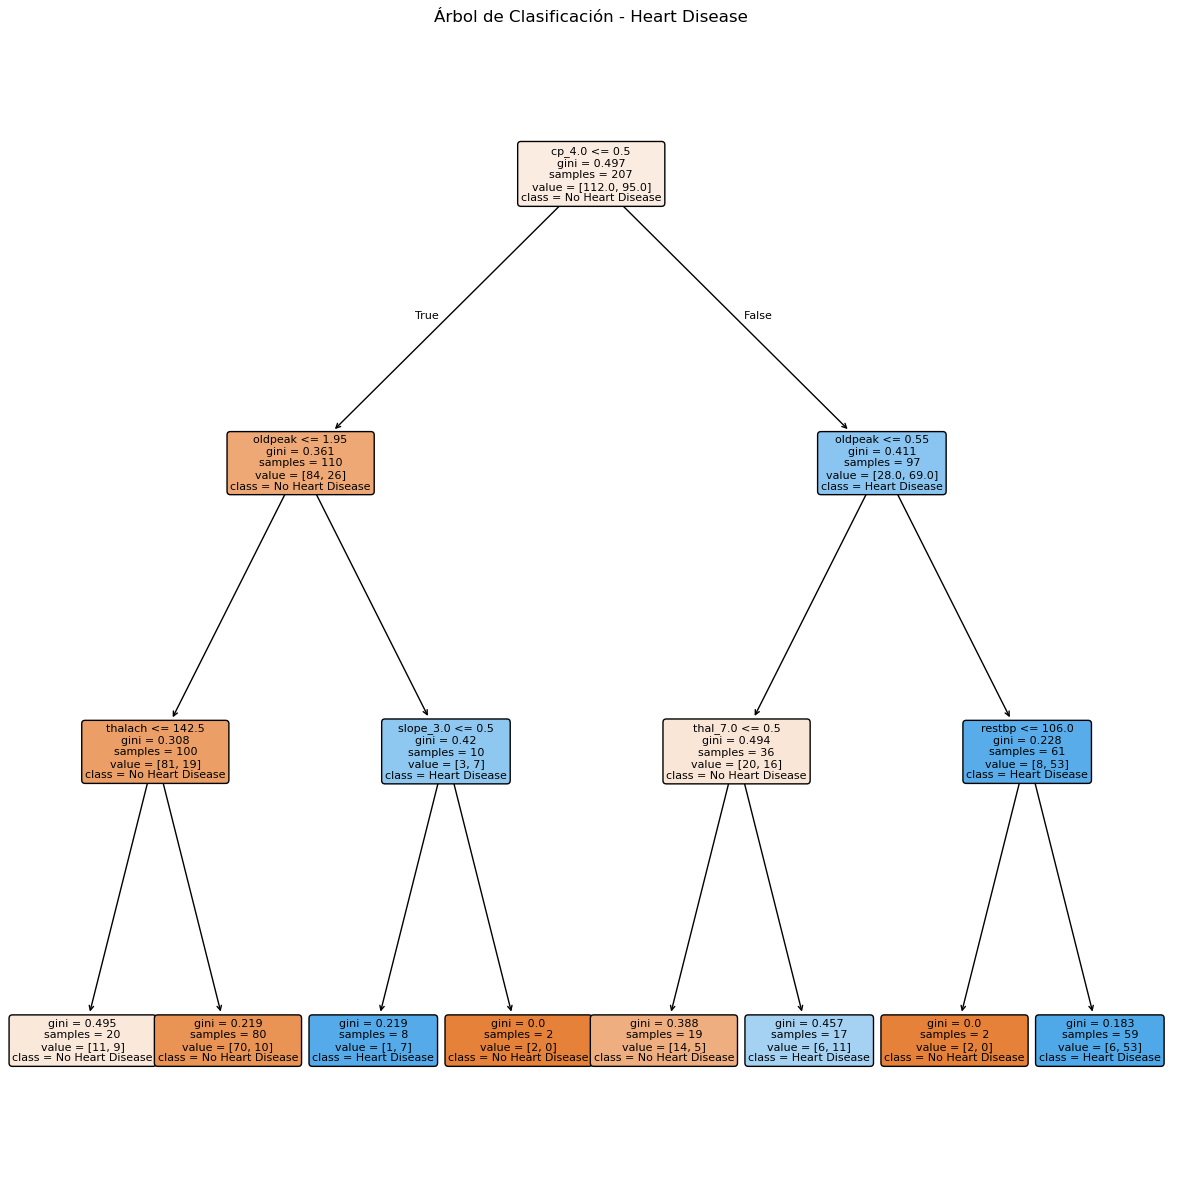

In [52]:
plt.figure(figsize=(15, 15))

# Usamos plot_tree para visualizar el árbol
plot_tree(
    clf, 
    feature_names=X.columns.tolist(),  # Nombres de las features
    class_names=['No Heart Disease', 'Heart Disease'], # Nombres de las clases
    filled=True,  # Colorea los nodos según la clase mayoritaria
    rounded=True, # Nodos con bordes redondeados
    fontsize=8    # Tamaño de la fuente
)

# Mostramos el gráfico
plt.title("Árbol de Clasificación - Heart Disease")
plt.show()

#### Plot the confusion matrix using the labels ["Does not have HD", "Has HD"] and interpret the results.

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

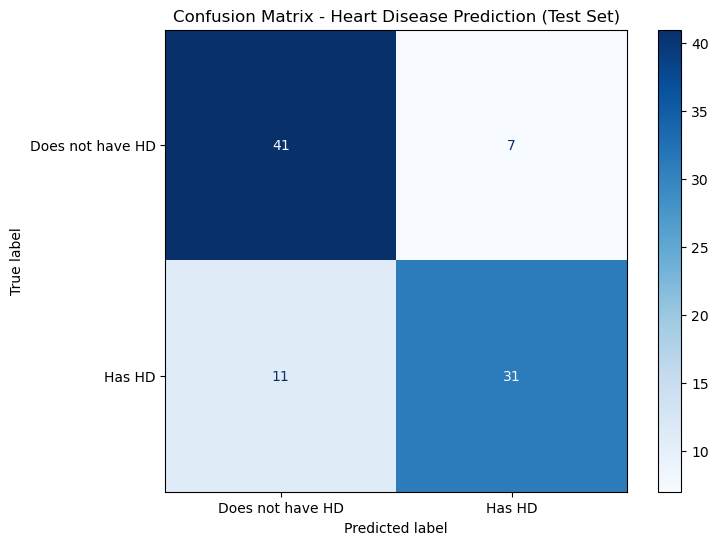

Confusion Matrix values:
[[41  7]
 [11 31]]

True Negatives (TN): 41
False Positives (FP): 7
False Negatives (FN): 11
True Positives (TP): 31


In [ ]:
# --- 1. Make Predictions on the Test Set ---
y_pred = clf.predict(X_test)

# --- 2. Calculate the Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- 3. Plot the Confusion Matrix ---
# Define the labels as requested
labels = ["Does not have HD", "Has HD"]

# Use ConfusionMatrixDisplay for a nicely formatted plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plotting using matplotlib
fig, ax = plt.subplots(figsize=(8, 6)) # Create figure and axes explicitly
disp.plot(cmap=plt.cm.Blues, ax=ax) # Pass the axes to the plot function

plt.title("Confusion Matrix - Heart Disease Prediction (Test Set)")
plt.show() # Display the plot

# Print the matrix values for clarity ---
print("Confusion Matrix values:")
print(cm)

# Calculate TP, TN, FP, FN for interpretation
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

Diagonal principal (41 y 31) son las predicciones correctas. En particular, 41 personas fueron correctamente identificas como sin enfermedad (sanas). Mientras que 31 personas fueron correctamente identificadas como con enfermedad (enfermas).

Fuera de la diagonal, se observan los errores del modelo ( 7 y 11 ). En específico 7 personas fueron diagnosticas como  enfermas cuando no lo estaban. Mientras que 11 fueron señalados como sanas cuando si tenian enfermedad.

###  Fixing the overfitting problem using cross-validation.

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [74]:
# Accuracy en entrenamiento y prueba
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy:  {test_acc:.3f}")

Train Accuracy: 0.821
Test Accuracy:  0.800


In [87]:
tree_cv = DecisionTreeClassifier(random_state=123, max_depth=3)

param_grid = {
    'max_depth': [1,2, 3, 4, 5, 6, 7, 8, None],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

In [92]:
# Configurar validación cruzada (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=123)

# Entrenar con búsqueda en grilla
grid_search = GridSearchCV(tree_cv, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...dom_state=123)
,param_grid,"{'ccp_alpha': [0.0, 0.01, ...], 'max_depth': [1, 2, ...], 'min_samples_leaf': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [93]:
# Obtener el mejor modelo encontrado
best_tree = grid_search.best_estimator_

# Predicciones en test
y_pred_best = best_tree.predict(X_test)

# Accuracy comparativo
best_train_acc = accuracy_score(y_train, best_tree.predict(X_train))
best_test_acc = accuracy_score(y_test, y_pred_best)

print(f"Training Accuracy (Optimized): {best_train_acc:.3f}")
print(f"Test Accuracy (Optimized):     {best_test_acc:.3f}")

Training Accuracy (Optimized): 0.739
Test Accuracy (Optimized):     0.789


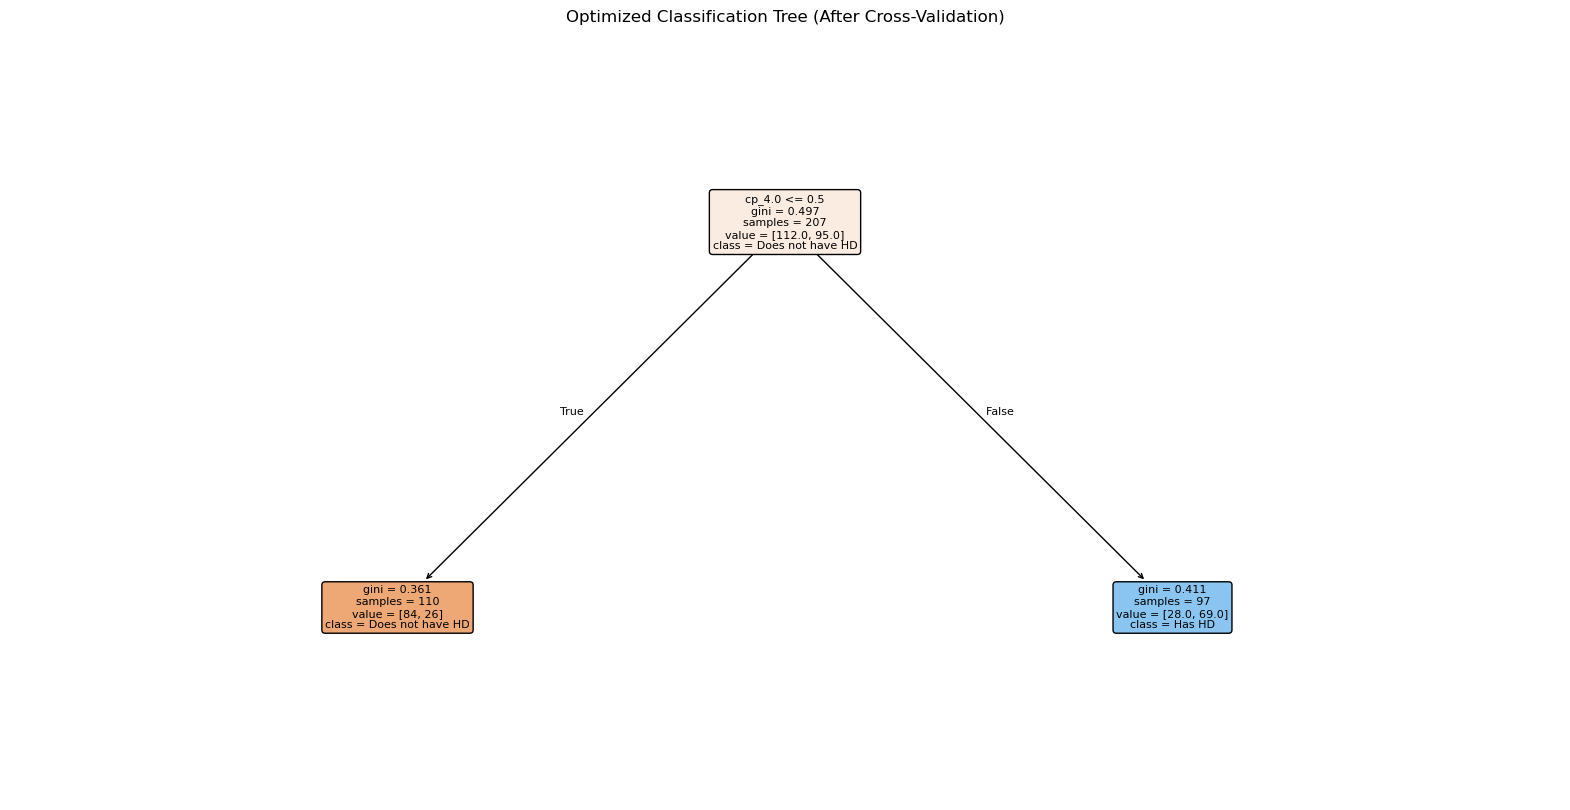

In [90]:
plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          filled=True,
          feature_names=X.columns,
          class_names=["Does not have HD", "Has HD"],
          rounded=True,
          fontsize=8)
plt.title("Optimized Classification Tree (After Cross-Validation)")
plt.show()

In [75]:
import numpy as np

# 50 valores de alpha entre e^-10 y 0.05 (escala logarítmica)
alphas = np.logspace(-10, np.log(0.05), 50, base=np.e)
alphas[:5]  # para ver los primeros valores


array([4.53999298e-05, 5.23763313e-05, 6.04247649e-05, 6.97099649e-05,
       8.04219795e-05])

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Guardar accuracy medio por cada alpha
cv_scores = []

for a in alphas:
    tree = DecisionTreeClassifier(random_state=123, ccp_alpha=a)
    scores = cross_val_score(tree, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(scores.mean())

# Convertir a array
cv_scores = np.array(cv_scores)


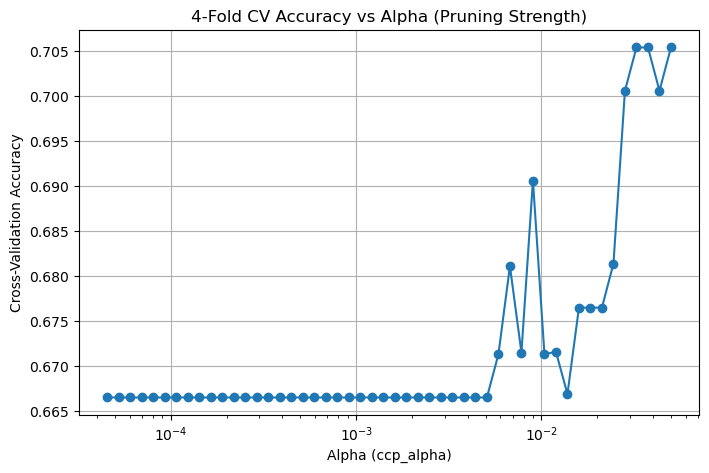

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(alphas, cv_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("4-Fold CV Accuracy vs Alpha (Pruning Strength)")
plt.grid(True)
plt.show()


In [78]:
# Alpha con mejor desempeño
best_alpha = alphas[np.argmax(cv_scores)]
print(f"Optimal alpha: {best_alpha:.6f}")
print(f"Best cross-validation accuracy: {cv_scores.max():.4f}")


Optimal alpha: 0.050000
Best cross-validation accuracy: 0.7054


In [79]:
# Entrenar árbol final con alpha óptimo
pruned_tree = DecisionTreeClassifier(random_state=123, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

# Evaluar en train y test
from sklearn.metrics import accuracy_score

train_acc_pruned = accuracy_score(y_train, pruned_tree.predict(X_train))
test_acc_pruned = accuracy_score(y_test, pruned_tree.predict(X_test))

print(f"Train Accuracy (pruned): {train_acc_pruned:.3f}")
print(f"Test Accuracy (pruned):  {test_acc_pruned:.3f}")


Train Accuracy (pruned): 0.739
Test Accuracy (pruned):  0.789


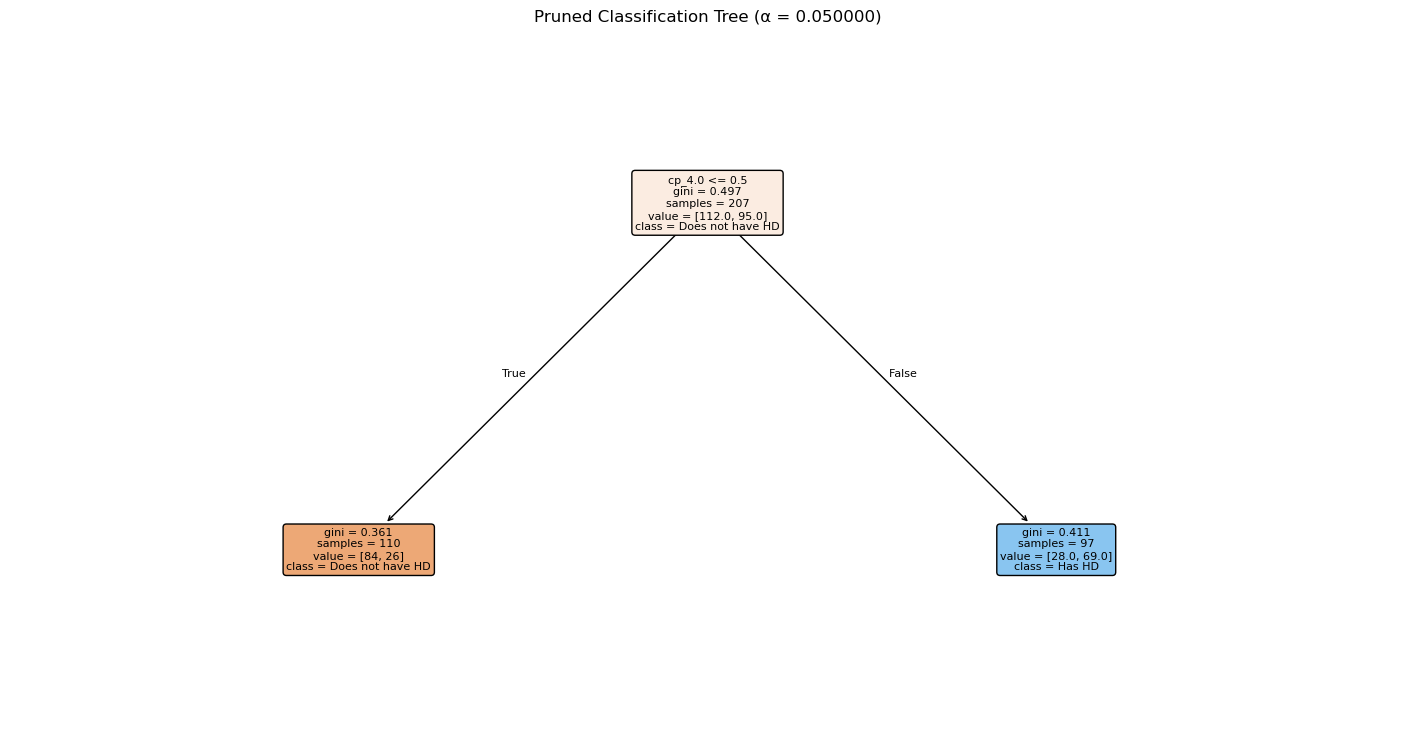

In [80]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18,9))
plot_tree(pruned_tree,
          filled=True,
          feature_names=X.columns,
          class_names=["Does not have HD", "Has HD"],
          rounded=True,
          fontsize=8)
plt.title(f"Pruned Classification Tree (α = {best_alpha:.6f})")
plt.show()


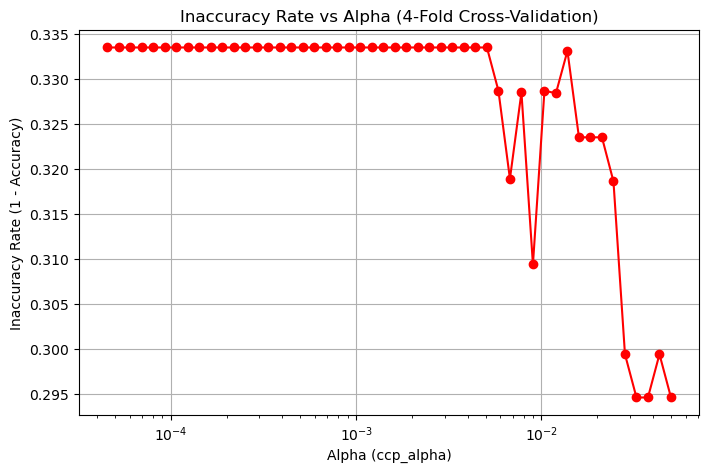

In [94]:
# Calcular tasa de error (1 - accuracy)
inaccuracy = 1 - cv_scores

# Graficar
plt.figure(figsize=(8,5))
plt.plot(alphas, inaccuracy, marker='o', color='red')
plt.xscale('log')
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Inaccuracy Rate (1 - Accuracy)")
plt.title("Inaccuracy Rate vs Alpha (4-Fold Cross-Validation)")
plt.grid(True)
plt.show()


### Plot again the classification tree and the confusion matrix using the optimal α. Interpret and briefly discuss the results.

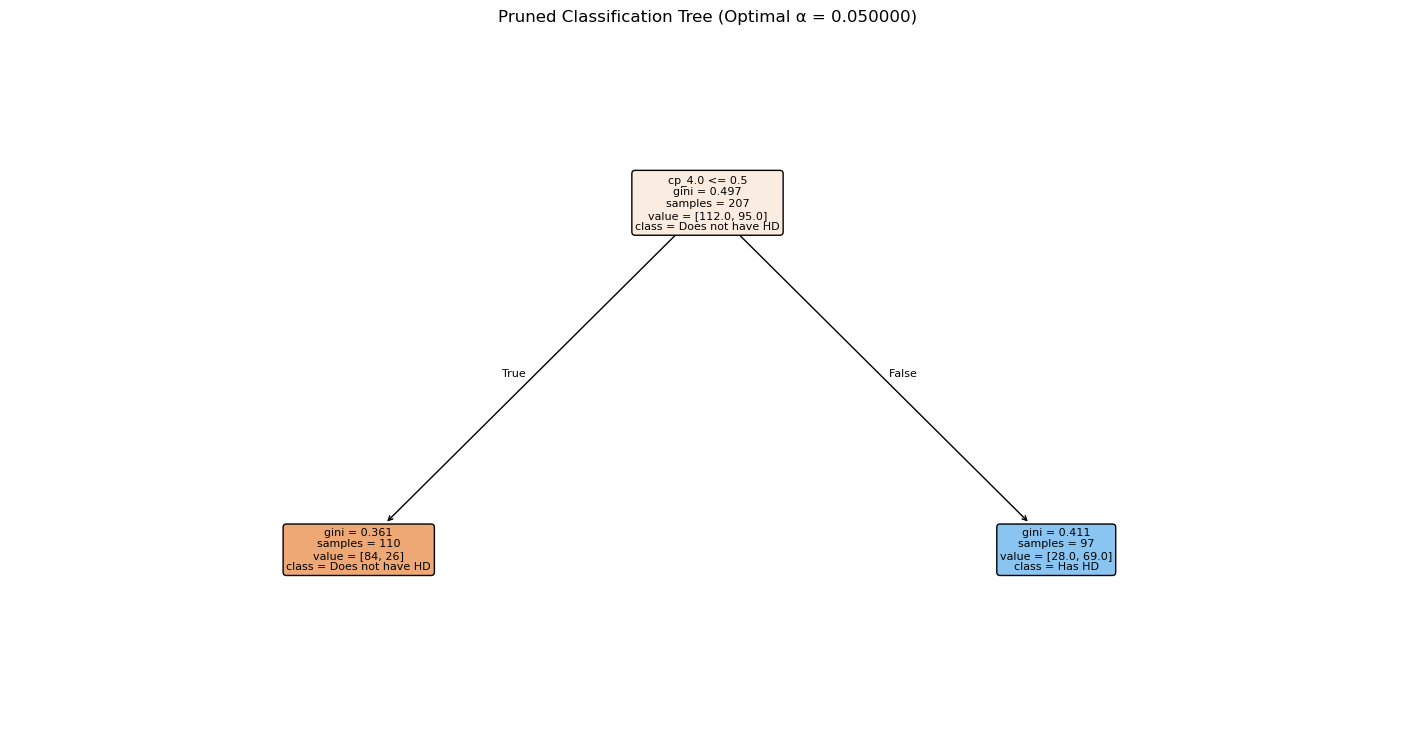

In [95]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,9))
plot_tree(pruned_tree,
          filled=True,
          feature_names=X.columns,
          class_names=["Does not have HD", "Has HD"],
          rounded=True,
          fontsize=8)
plt.title(f"Pruned Classification Tree (Optimal α = {best_alpha:.6f})")
plt.show()


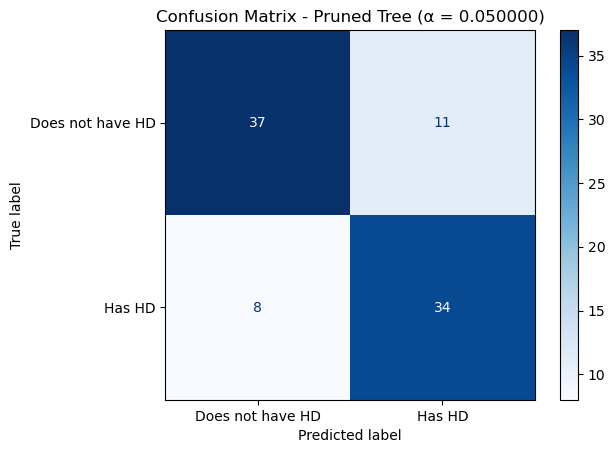

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones con el modelo podado
y_pred_pruned = pruned_tree.predict(X_test)

# Matriz de confusión
cm_pruned = confusion_matrix(y_test, y_pred_pruned)

# Mostrar
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pruned,
                              display_labels=["Does not have HD", "Has HD"])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - Pruned Tree (α = {best_alpha:.6f})")
plt.show()
